# Logistic Regression

Perceptron and Logistic Regression ONLY DIFFER by their activation functions:

- Perceptron: heaviside step function (i.e. `1.0 if activation >= 0.0 else 0.0`)

- Logistic Regression: sigmoid (i.e. `1.0 / (1.0 + np.exp(-activation))`)

**Linear Seperability:**

Many basic models (such as those trained by perceptron and logistic regression) can only represent linearly seperable classes.

Classes are "linearly seperable" if, when plotted on a coordinate plane, a _single_ straight line can be used to separate the classes.

For example: AND and OR are linearly seperable, but XOR is not.

**There are three implementations of 'Logistic Regression' below:**

- [Iterative](#Iterative)
- [Vectorized](#Vectorized)
- [TensorFlow](#TensorFlow)

## Iterative

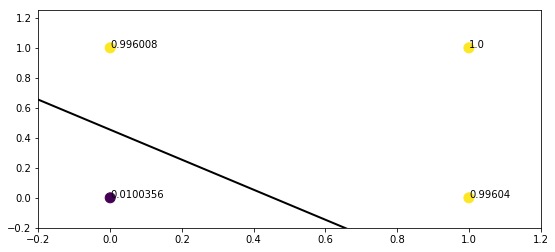

In [38]:
# Clear variables from previous execution.
%reset -f
# Enable interactive charts.
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Iterations ⇒ Accuracy
num_iterations = 500

# Speed in which new value is learned and old value is forgotten.
# (Max = 1, memory like a sieve, Min = 0.000...1)
learning_rate = 1

# Input: 4x Observations. 2x Features.
training_input = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)

# Labels: OR(Feature1, Feature2).
training_labels = np.array([0, 1, 1, 1], np.float32)

# Extract shape of data.
num_samples, num_features = np.shape(training_input)

# Weights: 1 per edge (so 1 per feature... so 2).
weights = np.zeros(num_features, np.float32)

# Biases: 1 per neuron (so 1 in a perceptron!)
biases = np.zeros(1, np.float32)

# Training. Iteratively updates weights and bias. The process represents
# a gradient descent of sorts (not optimized, i.e. not stochastic).
for k in range(num_iterations):
    for j in range(num_samples):
        # Features for this sample.
        features = training_input[j, :]
        
        # Weigh and combine neuron inputs using a LINEAR equation. Called the 'activation'.
        # Specifically, we multiply each feature by its weight, then sum them (i.e. perform
        # a dot product), then add the neuron's bias. Initially, the result is always 0 (as
        # weights and biases are initialized to 0).
        activation = features.dot(weights) + biases

        # Activation function (aka transfer function). Must be a NON-LINEAR equation (as this
        # allows the model to predict non-linear relationships). It's often called the 
        # activation function because it's a 'function of the activation'. Here we use sigmoid
        # because it outputs 0 to 1, and our labels are 0 to 1.
        prediction = 1.0 / (1.0 + np.exp(-activation))

        # Loss function. This is simply a delta, rather than absolute error, squared error, etc.
        label = training_labels[j]
        
        # Error points in the DIRECTION and MAGNITUDE the label needs to change (normalized
        # between -1 and 1).
        error = label - prediction
        
        # Backpropogation (i.e. update the model's parameters)
        # Prediction = Features · Weights + Bias, so if we increase weights & bias, we increase
        # the prediction, and visa-versa. As previously mentioned, the 'error' defines the
        # direction and magnitude to move in.
        deltaW = error * features
        deltaB = error
        weights = weights + learning_rate * deltaW
        biases = biases + learning_rate * deltaB
        
# Scatter inputs across X and Y axis, with the label used for colouring for each point.
plt.figure(figsize=(9,4))
plt.scatter(training_input[:, 0], 
            training_input[:, 1], 
            c=training_labels, 
            s=100, 
            cmap='viridis')

# Run Prediction (i.e. validate):
validation_predictions = 1.0 / (1.0 + np.exp(-(training_input.dot(weights) + biases)))

# Scatter predictions over the top of inputs.
for i, txt in enumerate(validation_predictions):
    plt.annotate(txt, (training_input[i, 0], training_input[i, 1]))

# Draw a line that depicts which pairs of feature values (i.e. x=X0 and y=X1) represent a 50%
# probability of being classified as a '1' or a '0'. Anything above this line represents a '1'
# and anything below represents a '0'.
# - To draw this line, we take the left-most edge of the chart, and right-most edge of the
#   chart as 2 values for the X0 feature (this gives us the values to use on the x-axis).
# - We assume a prediction of 0.5.
# - We then solve for the X1 feature (the y-axis) by rearranging the model in terms of X1:
#   1. Start with the model:
#        Prediction = (1.0 / (1.0 + np.exp(-(W0*X0 + W1*X1 + B))))
#   2. Rearrange in terms of X1 (the feature we're trying to deduce):
#        X1 = ((ln((1.0 / Prediction) - 1.0) * -1) - (B + W0*X0)) / W1
#   3. Given the prediction of 0.5 (the minimum required for a positive classification):
#        X1 = ((ln((1.0 / 0.5) - 1.0) * -1) - (B + W0*X0)) / W1
#   4. Simplify equation (natural log simplifies to 0 with these variables):
#        X1 = (-1 * (B + W0*X0)) / W1
# - X coordinates: Feature 1 (X0)
# - Y coordinates: Feature 2 (X1)
line_x = np.array([np.min(training_input[:, 0] - 0.2), np.max(training_input[:, 1]+0.2)])
line_y = (-1 * (biases + weights[0]*line_x)) / weights[1]
plt.plot(line_x, line_y, color='k', linewidth=2)

# Bound axis for chart.
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.25])
plt.show()

## Vectorized

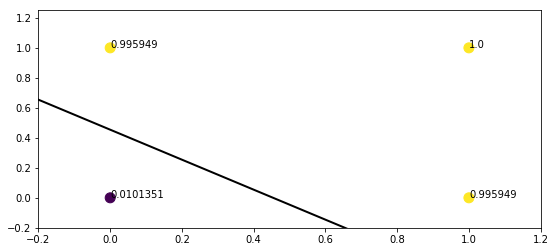

In [39]:
# Clear variables from previous execution.
%reset -f
# Enable interactive charts.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Iterations ⇒ Accuracy
num_iterations = 500

# Speed in which new value is learned and old value is forgotten.
# (Max = 1, memory like a sieve, Min = 0.000...1)
learning_rate = 1

# Input: 4x Observations. 2x Features.
training_input = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)

# Labels: OR(Feature1, Feature2).
training_labels = np.array([0, 1, 1, 1], np.float32)

# Extract shape of data.
num_samples, num_features = np.shape(training_input)

# Weights: 1 per edge (so 1 per feature... so 2).
weights = np.zeros(num_features, np.float32)

# Biases: 1 per neuron (so 1 in a perceptron!)
biases = np.zeros(1, np.float32)

# Training. Iteratively updates weights and bias. The process represents
# a gradient descent of sorts (not optimized, i.e. not stochastic).
for k in range(num_iterations):
    # Weigh and combine neuron inputs using a LINEAR equation. Called the 'activation'.
    # Specifically, we multiply each feature by its weight, then sum them (i.e. perform
    # a dot product), then add the neuron's bias. Initially, the result is always 0 (as
    # weights and biases are initialized to 0).
    activation = training_input.dot(weights) + biases # [a,b,c,d]
    
    # Activation function (aka transfer function). Must be a NON-LINEAR equation (as this
    # allows the model to predict non-linear relationships). It's often called the activation
    # function because it's a 'function of the activation'. Here we use sigmoid because it
    # outputs 0 to 1, and our labels are 0 to 1.
    prediction = 1.0 / (1.0 + np.exp(-activation)) # [a,b,c,d]
    
    # Loss function. This is simply a delta, rather than absolute error, squared error, etc.
    # Error points in the DIRECTION and MAGNITUDE the label needs to change (normalized
    # between -1 and 1).
    error = training_labels - prediction # [a,b,c,d]
    
    # Backpropogation (i.e. update the model's parameters)
    # -  Prediction = Features · Weights + Bias, so if we increase weights & bias, we increase
    #    the prediction, and visa-versa.
    # -  As previously mentioned, the 'error' defines the direction and magnitude to move in.
    
    # 1. Update bias (i.e. sum the errors from each sample. Gives us a scalar.).
    biases_delta = np.sum(error)
    biases = biases + learning_rate * biases_delta
    
    # 2. Update weights (i.e. for each feature in each sample: multiply the feature by the error
    #    and sum for that sample (i.e. dot product). Gives us a vector of the same length as the
    #    features.) Requires us to transpose input so it's the correct shape.
    weights_delta = np.transpose(training_input).dot(error) # [a,b]
    weights = weights + learning_rate * weights_delta
        
# Scatter inputs across X and Y axis, with the label used for colouring for each point.
plt.figure(figsize=(9,4))
plt.scatter(training_input[:, 0], training_input[:, 1], c=training_labels, s=100, cmap='viridis')

# Run Prediction (i.e. validate) and draw predictions on chart:
validation_predictions = 1.0 / (1.0 + np.exp(-(training_input.dot(weights) + biases)))
for i, txt in enumerate(validation_predictions):
    plt.annotate(txt, (training_input[i, 0], training_input[i, 1]))

# Draw a line that depicts which pairs of feature values (i.e. x=X0 and y=X1) represent a 50%
# probability of being classified as a '1' or a '0'. Anything above this line represents a '1'
# and anything below represents a '0'.
# - To draw this line, we take the left-most edge of the chart, and right-most edge of the
#   chart as 2 values for the X0 feature (this gives us the values to use on the x-axis).
# - We assume a prediction of 0.5.
# - We then solve for the X1 feature (the y-axis) by rearranging the model in terms of X1:
#   1. Start with the model:
#        Prediction = (1.0 / (1.0 + np.exp(-(W0*X0 + W1*X1 + B))))
#   2. Rearrange in terms of X1 (the feature we're trying to deduce):
#        X1 = ((ln((1.0 / Prediction) - 1.0) * -1) - (B + W0*X0)) / W1
#   3. Given the prediction of 0.5 (the minimum required for a positive classification):
#        X1 = ((ln((1.0 / 0.5) - 1.0) * -1) - (B + W0*X0)) / W1
#   4. Simplify equation (natural log simplifies to 0 with these variables):
#        X1 = (-1 * (B + W0*X0)) / W1
# - X coordinates: Feature 1 (X0)
# - Y coordinates: Feature 2 (X1)
line_x = np.array([np.min(training_input[:, 0] - 0.2), np.max(training_input[:, 1]+0.2)])
line_y = (-1 * (biases + weights[0]*line_x)) / weights[1]
plt.plot(line_x, line_y, color='k', linewidth=2)

# Bound axis for chart.
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.25])
plt.show()

## TensorFlow

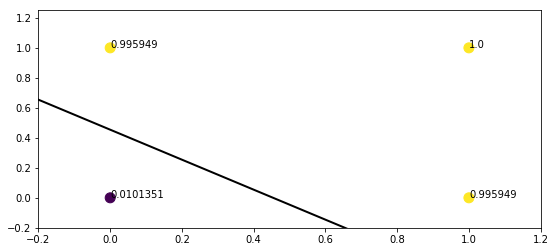

In [40]:
# Clear variables from previous execution.
%reset -f
# Enable interactive charts.
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Iterations ⇒ Accuracy
num_iterations = 500

# Speed in which new value is learned and old value is forgotten.
# (Max = 1, memory like a sieve, Min = 0.000...1)
learning_rate = 1

# Input: 4x Observations. 2x Features.
training_input_arr = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input

# Labels: OR(Feature1, Feature2).
training_labels_arr 		 = np.array([0, 1, 1, 1], np.float32)
training_labels_arr_original = training_labels_arr
training_labels_arr 		 = np.reshape(training_labels_arr, [4, 1]) # convert 4 to 4x1

# Extract shape of data.
num_samples, num_features = np.shape(training_input_arr)

# Placeholders for input & labels (i.e. parameters we feed into the TF model).
training_input  = tf.placeholder(tf.float32, shape=[4, 2])
training_labels = tf.placeholder(tf.float32, shape=[4, 1])

# Weights: 1 per edge (so 1 per feature... so 2).
weights = tf.Variable(tf.zeros([num_features, 1]), tf.float32)

# Biases: 1 per neuron (so 1 in a perceptron!)
biases  = tf.Variable(tf.zeros([1, 1]), tf.float32)

# The function 'matmul(input, weights)' performs a matrix multiplication. This is effectively a
# dot-product of each row (Y) in 'input' with each column (X) in 'weights', resulting in a 
# matrix of dimension X x Y, where each cell represents a dot-product. We then add the bias to
# each dot-product to give us the activation.
activation = tf.add(tf.matmul(training_input, weights), biases)

# Activation function (aka transfer function). Must be a NON-LINEAR equation (as this
# allows the model to predict non-linear relationships). It's often called the activation
# function because it's a 'function of the activation'. Here we use sigmoid because it
# outputs 0 to 1, and our labels are 0 to 1.
prediction = tf.sigmoid(activation)

# Loss function. This is simply a delta, rather than absolute error, squared error, etc.
# Error points in the DIRECTION and MAGNITUDE the label needs to change (normalized
# between -1 and 1).
error = training_labels - prediction

# Backpropogation (i.e. update the model's parameters)
# -  Prediction = Features · Weights + Bias, so if we increase weights & bias, we increase
#    the prediction, and visa-versa.
# -  As previously mentioned, the 'error' defines the direction and magnitude to move in.

# 1. Update bias (i.e. sum the errors from each sample. Gives us a scalar.).
biases_delta = tf.reduce_sum(error, 0) # 4, have to 1x1. sum all the biases? yes
biases_updated = biases + learning_rate * biases_delta

# 2. Update weights (i.e. for each feature in each sample: multiply the feature by the error
#    and sum for that sample (i.e. dot product). Gives us a vector of the same length as the
#    features.) Requires us to transpose input so it's the correct shape.
weights_delta = tf.matmul(tf.transpose(training_input), error) # have to be 2x1
weights_updated = weights + learning_rate * weights_delta

# Record the above transformations into a DAG we'll call "step", so that we can run it later.
step = tf.group(weights.assign(weights_updated), biases.assign(biases_updated))

# Initialize new TensorFlow session.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Run the DAG multiple times, updating the 'weights' and 'baises' each time.
# Note: we do pass the input & labels in each time, but these are just constants: the
#       placeholders they initialize never change during the course of the training (incase you
#       think we're reinitializing state on each iteration!).
for k in range(num_iterations):
	sess.run([step],
			 feed_dict={
				 training_input: training_input_arr,
				 training_labels: training_labels_arr
			 })

# Grab the resulting weights and biases from TensorFlow.
final_weights = np.squeeze(sess.run(weights))
final_biases = np.squeeze(sess.run(biases))

# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([
	np.min(training_input_arr[:, 0] - 0.2),
	np.max(training_input_arr[:, 1] + 0.2)
])
plot_y = - 1 / final_weights[1] * (final_weights[0] * plot_x + final_biases)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)

# Scatter inputs across X and Y axis, with the label used for colouring for each point.
plt.figure(figsize=(9,4))
plt.scatter(training_input_arr[:, 0],
			training_input_arr[:, 1],
			c=training_labels_arr_original,
			s=100,
			cmap='viridis')

# Run Prediction (i.e. validate) and draw predictions on chart:
validation_activations = training_input_arr.dot(final_weights) + final_biases
validation_predictions = 1.0 / (1.0 + np.exp(-(validation_activations)))
for i, txt in enumerate(validation_predictions):
	plt.annotate(txt, (training_input_arr[i, 0], training_input_arr[i, 1]))

plt.plot(plot_x, plot_y, color='k', linewidth=2)

# Bound axis for chart.
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.25])
plt.show()